In [208]:
def x_in_bounds(x,bounds):
    for i in range(len(x)):
        if x[i] < bounds[i,0] or x[i] > bounds[i,1]: return False
        return True

def global_step(x, obj_func, bounds):
    ####x is x where in bounds
    x_new = []
    for i in range(len(x)):
        if x_in_bounds(x[i],bounds): x_new.append(x[i])
    x = np.asarray(x_new)
    y = np.empty((len(x)))
    orig_len = len(x)
    for i in range(len(x)): 
        y[i] = schwefel(x[i])
    sorted_indices = np.argsort(y)
    y = y[sorted_indices]
    x = x[sorted_indices]
    x = np.array(x[:-int(len(x)/2)])
    y = np.array(y[:-int(len(x)/2)])
    cov = np.cov(x.T)
    mean= np.mean(x , axis = 0) 
    offspring = np.random.multivariate_normal(mean, cov, size = orig_len)
    return mean,offspring

In [209]:
def schwefel(x,args = None):
    return 418.9829*len(x) - np.sum(x*np.sin(np.sqrt(np.abs(x)))) + (np.sqrt((x[0]+200)**2 + (x[1]+200)**2)**2)/100.0

In [210]:
def plot_schwefel(bounds = [[-400,400],[-500,500]], resolution = 100, points = None, deflation_points = None, mean = None):
    X = np.linspace(bounds[0][0], bounds[0][1], resolution)
    Y = np.linspace(bounds[1][0], bounds[1][1], resolution)
    X, Y = np.meshgrid(X, Y)
    s = np.empty((X.shape))

    for i in range(len(X)):
        for j in range(len(Y)):
            s[i,j] = schwefel(np.array([X[i,j],Y[i,j]]))
                
    fig = plt.figure(0)
    a = plt.pcolormesh(X, Y, s, cmap=cm.viridis)
    plt.scatter(x[:,0],x[:,1])
    plt.scatter(mean[0],mean[1])
    plt.colorbar(a)
    plt.show()

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
x = np.random.uniform(low = -400 , high = 500,size = (50,2))

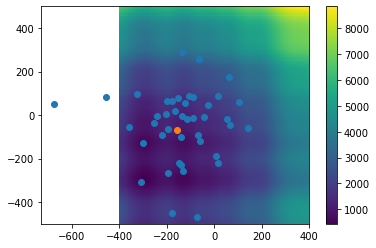

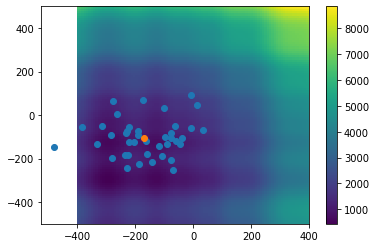

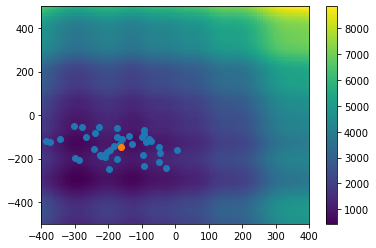

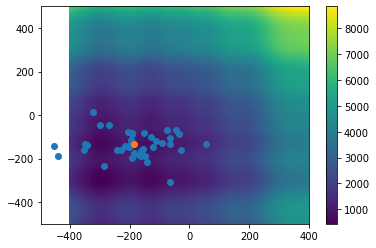

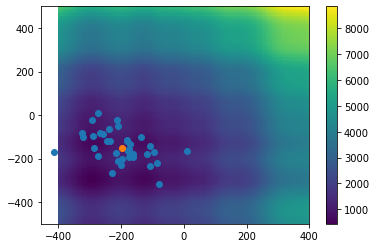

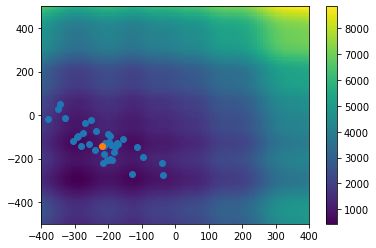

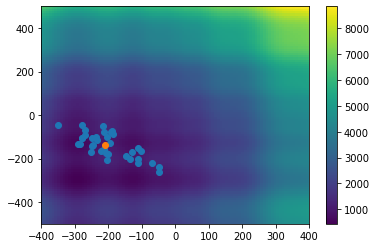

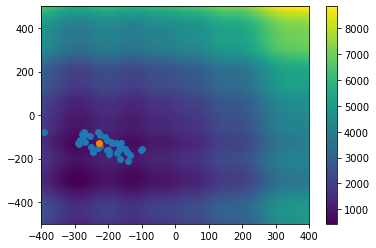

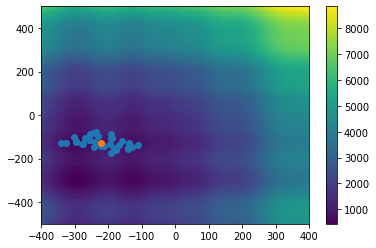

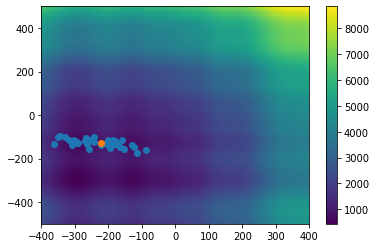

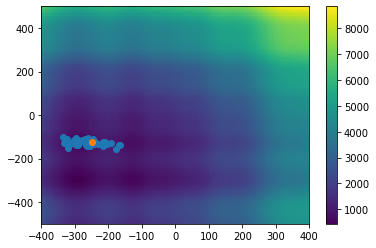

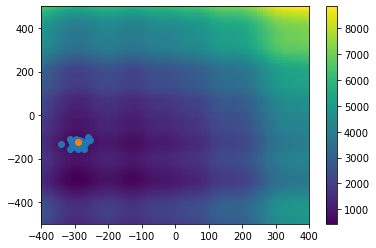

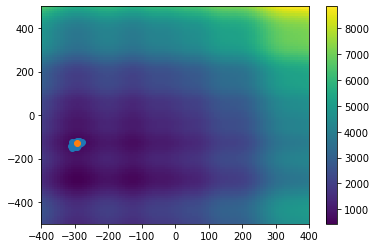

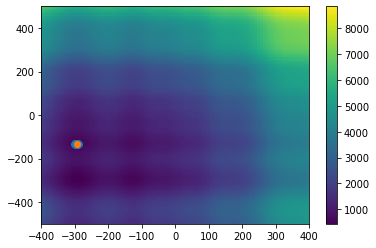

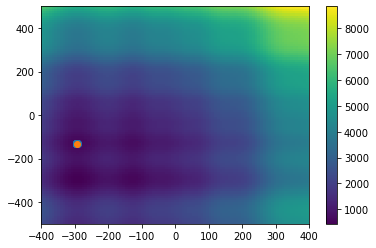

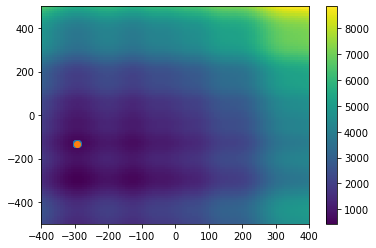

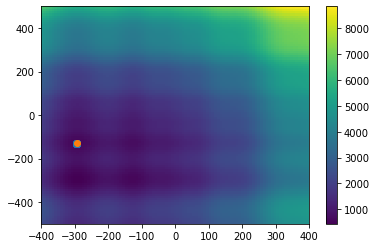

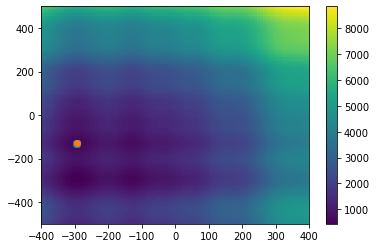

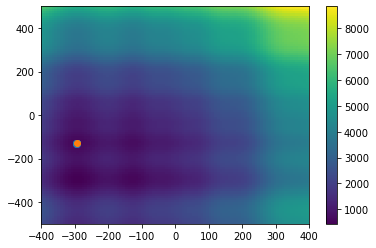

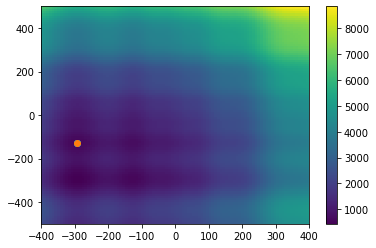

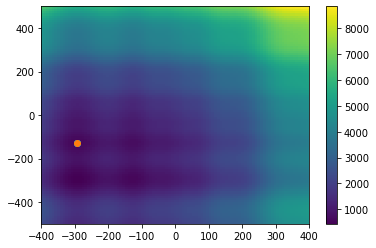

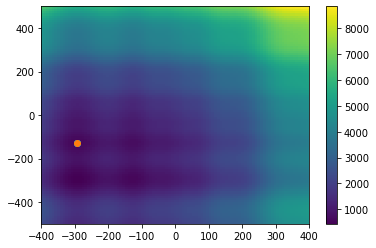

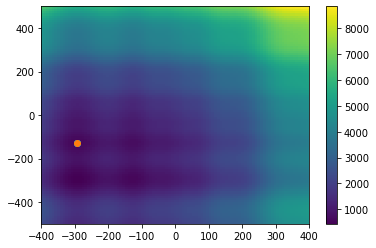

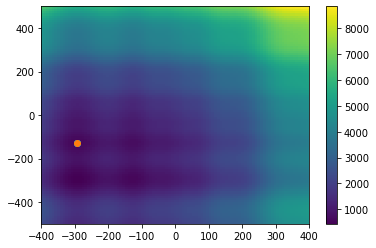

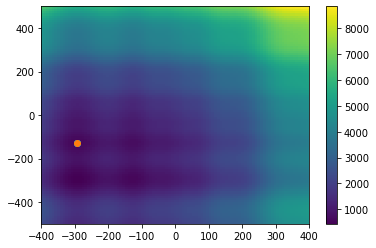

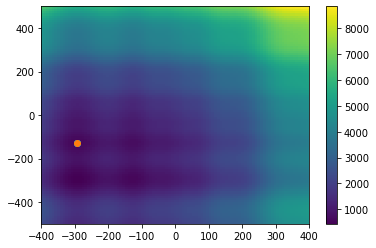

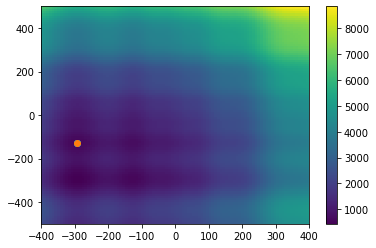

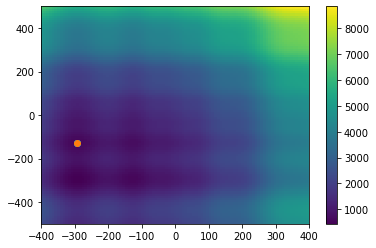

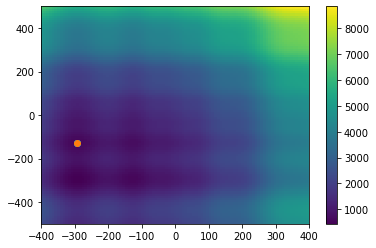

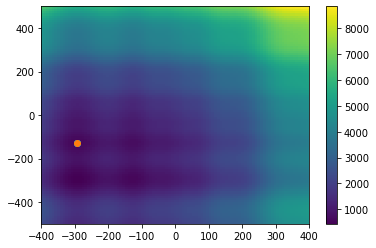

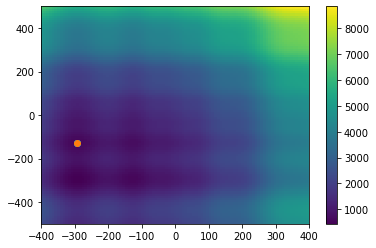

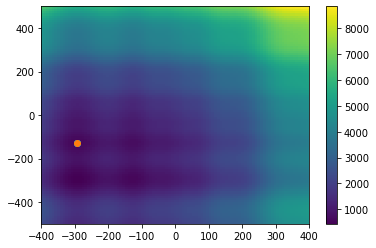

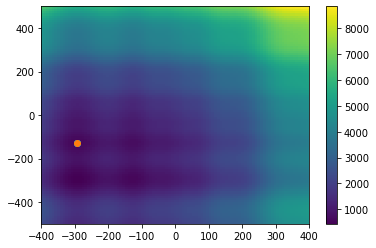

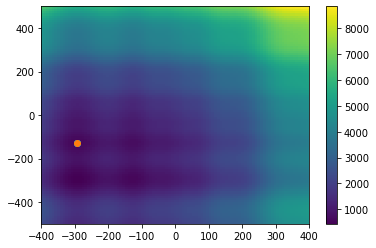

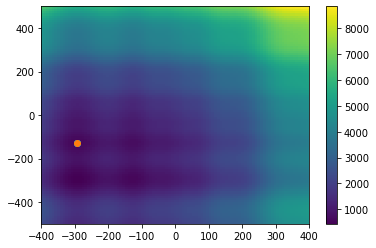

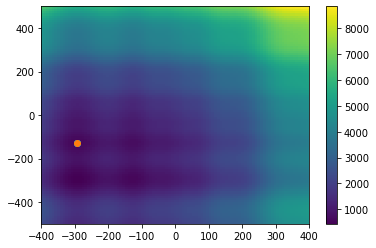

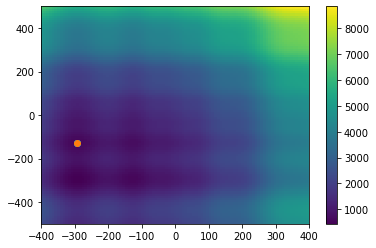

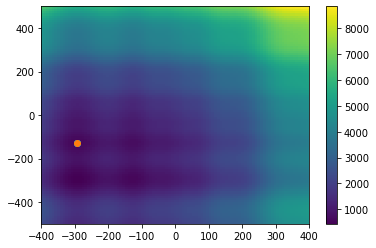

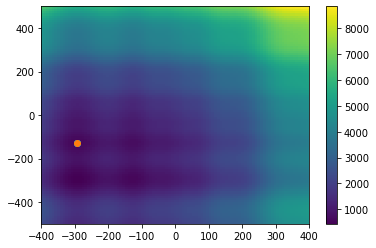

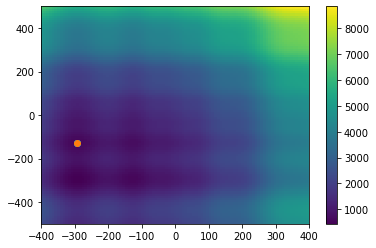

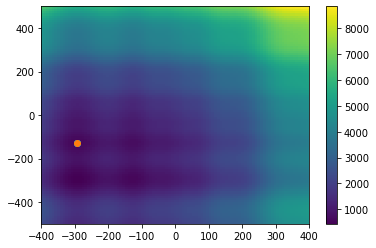

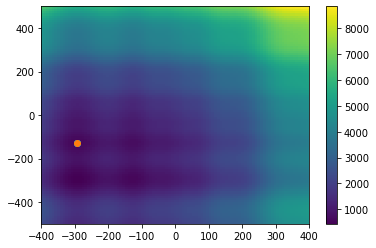

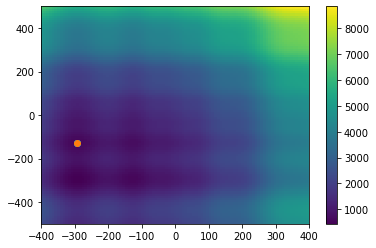

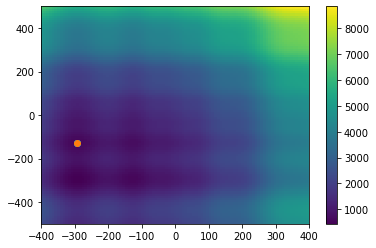

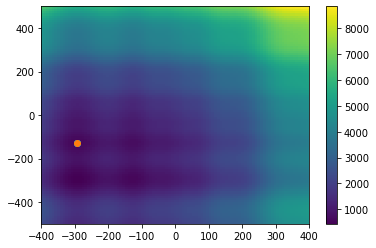

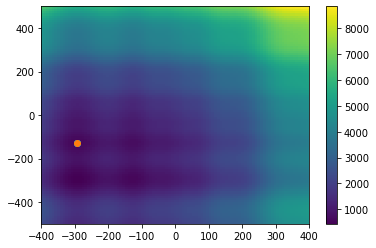

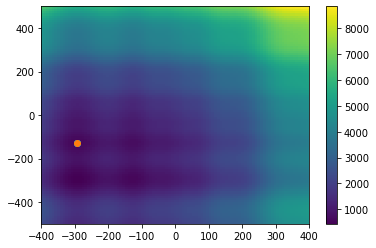

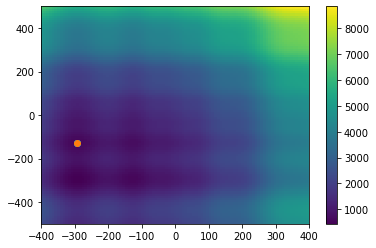

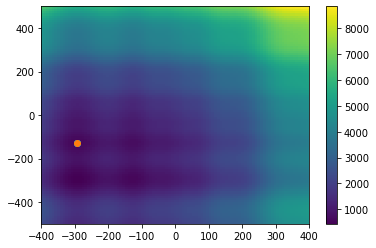

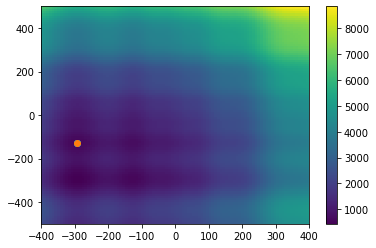

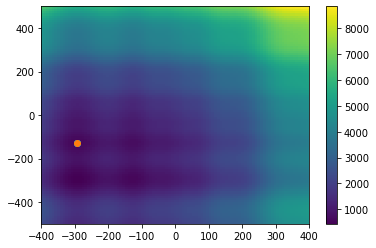

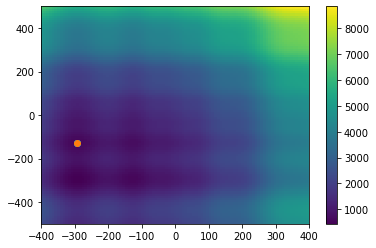

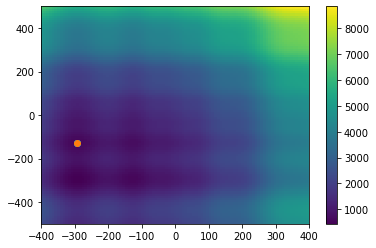

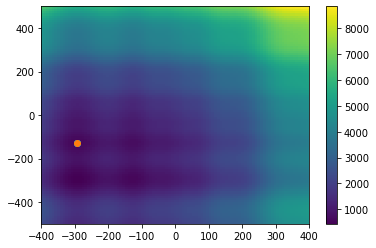

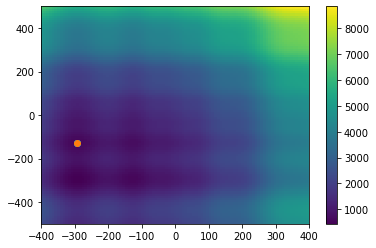

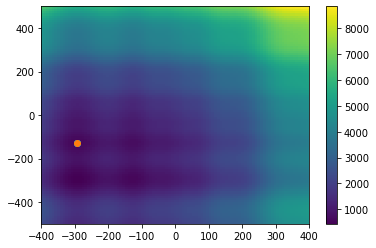

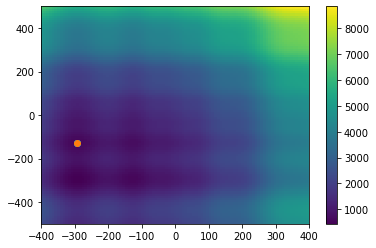

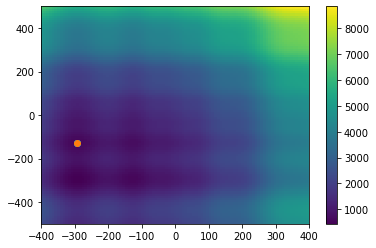

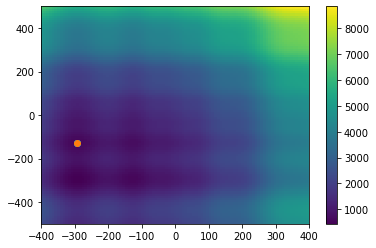

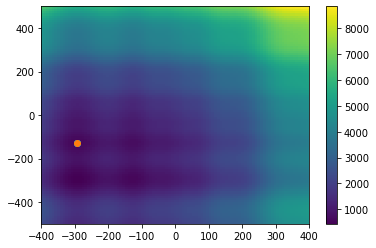

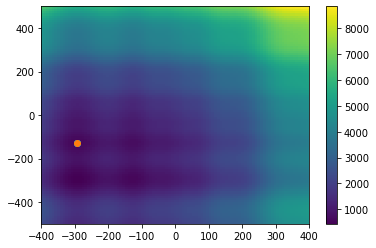

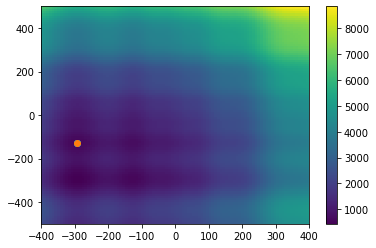

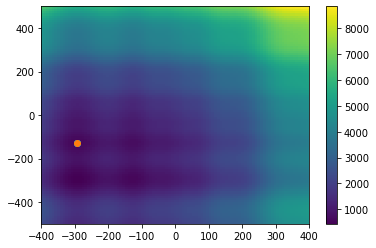

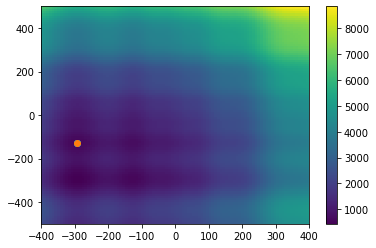

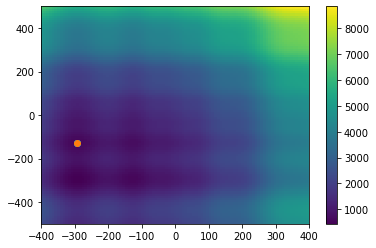

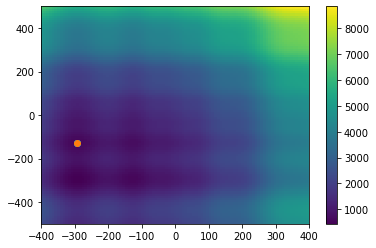

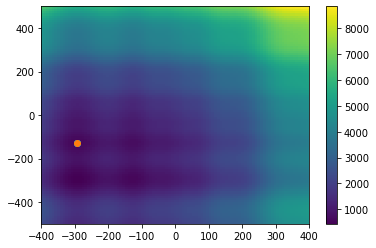

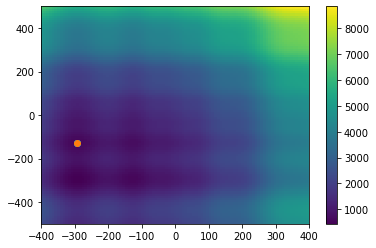

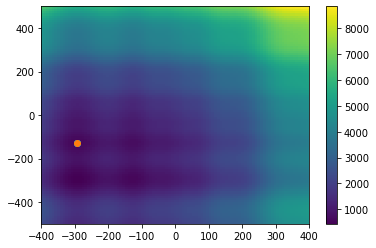

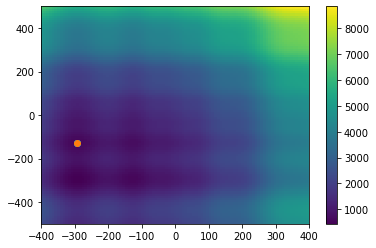

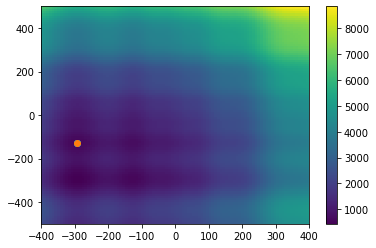

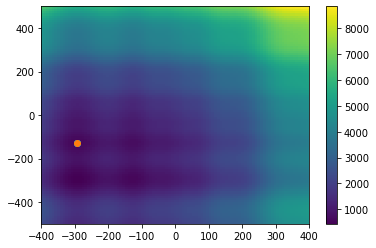

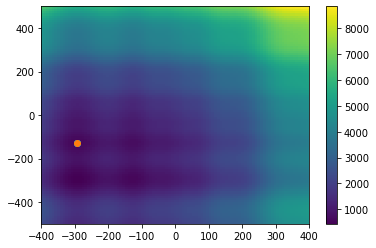

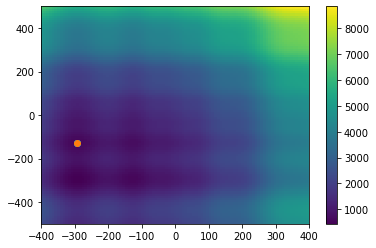

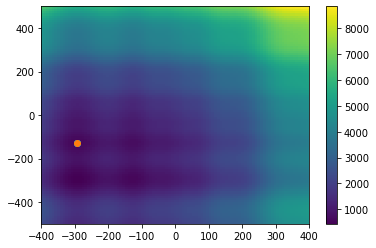

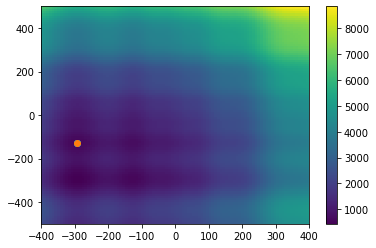

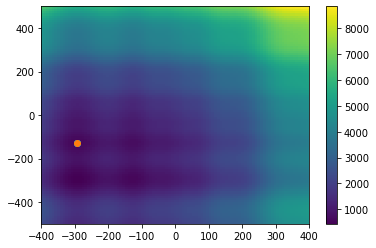

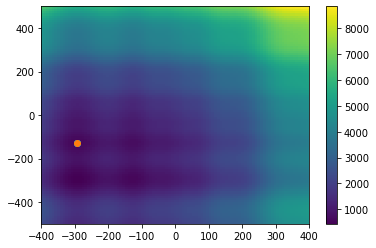

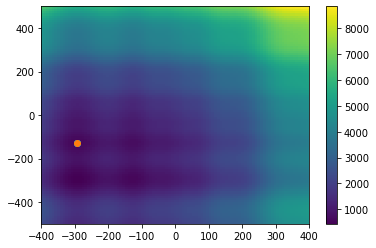

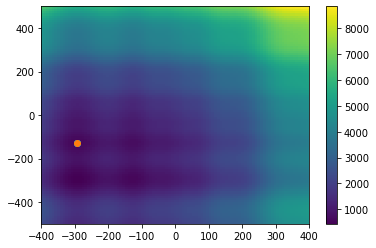

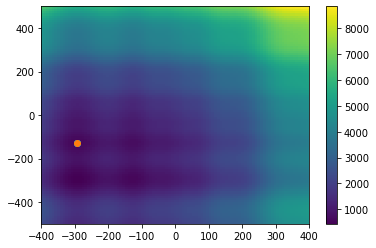

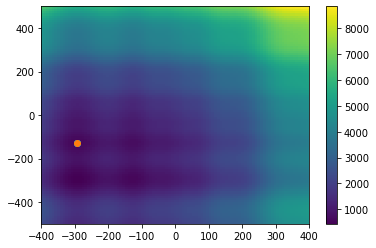

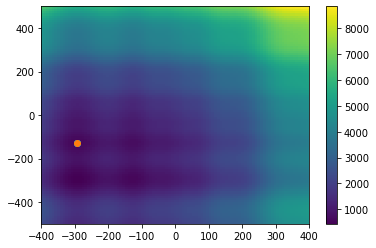

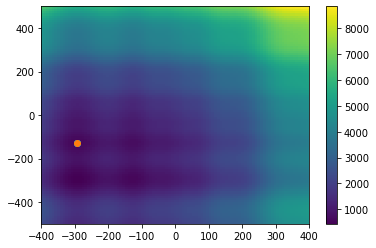

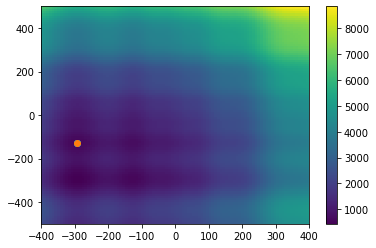

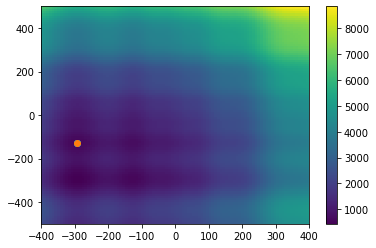

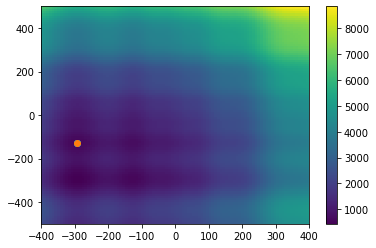

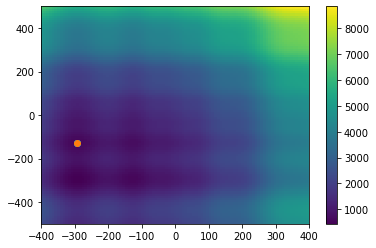

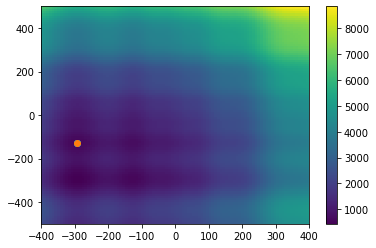

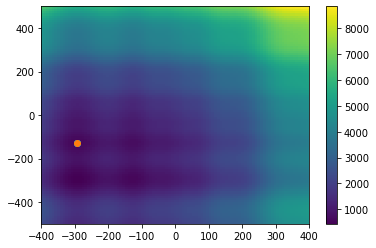

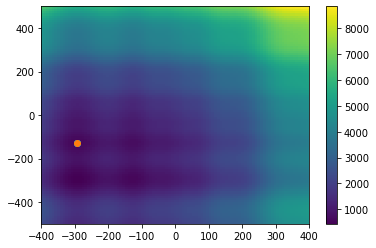

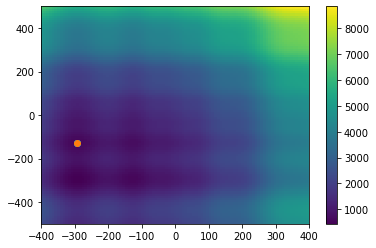

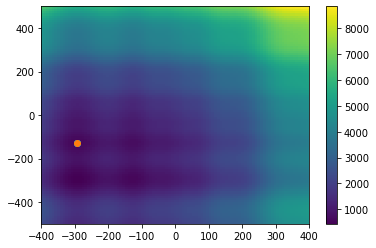

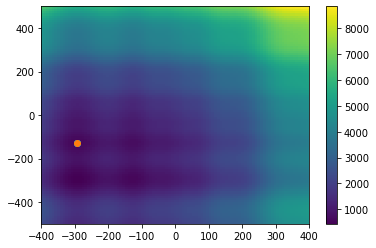

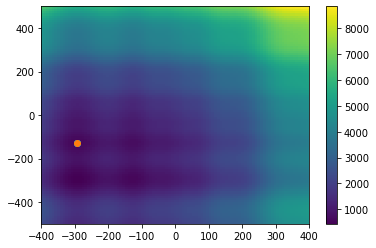

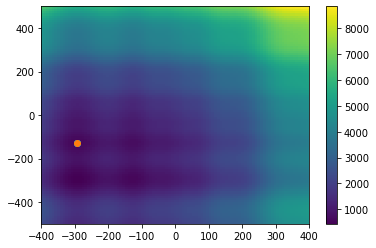

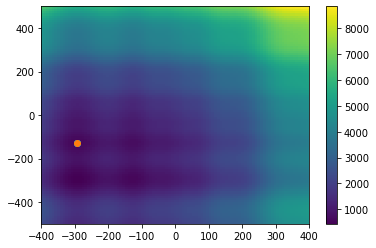

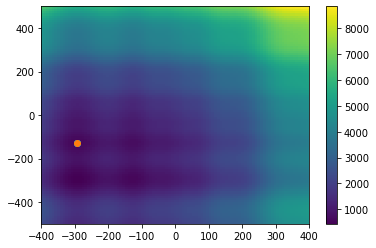

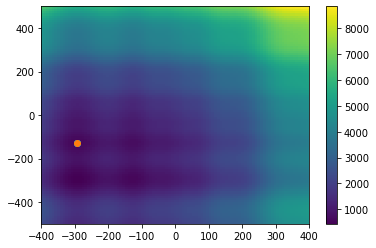

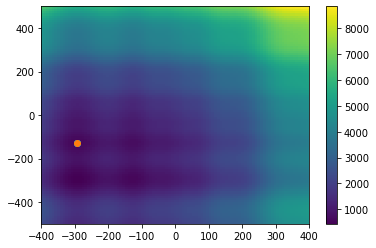

In [212]:
bounds = np.array([[-400,400],[-500,500]])
for i in range(100):
    mean, x = global_step(x,schwefel, bounds)
    plot_schwefel(points = x, mean = mean)